<img width="800px" src="../fidle/img/00-Fidle-header-01.svg"></img>

# <!-- TITLE --> [GRAD1] - Linear regression with gradient descent
<!-- DESC --> Low level implementation of a solution by gradient descent. Basic and stochastic approach.
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->


## Objectives :
 - To illustrate the iterative approach of a gradient descent

## What we're going to do :

Equation : $ Y = X.\Theta + N$  
Where N is a noise vector
and $\Theta = (a,b)$ a vector as y = a.x + b

We will calculate a loss function and its gradient.  
We will descend this gradient in order to find a minimum value of our loss function.

$
\triangledown_\theta MSE(\Theta)=\begin{bmatrix}
\frac{\partial}{\partial \theta_0}MSE(\Theta)\\
\frac{\partial}{\partial \theta_1}MSE(\Theta)\\
\vdots\\
\frac{\partial}{\partial \theta_n}MSE(\Theta)
\end{bmatrix}=\frac2m X^T\cdot(X\cdot\Theta-Y)
$  

and :  

$\Theta \leftarrow \Theta - \eta \cdot \triangledown_\theta MSE(\Theta)$

where $\eta$ is the learning rate

## Step 1 - Import and init


In [1]:
import numpy as np
import sys

sys.path.append('..')
import fidle.pwk as pwk

from modules.RegressionCooker import RegressionCooker 

# ---- Init Fidle stuffs
#
datasets_dir = pwk.init('GRAD1')

# ---- Instanciate a Regression Cooker
#
cooker = RegressionCooker(pwk)

<br>**FIDLE 2020 - Practical Work Module**

Version              : 2.0.7
Notebook id          : GRAD1
Run time             : Wednesday 27 January 2021, 18:21:13
TensorFlow version   : 2.2.0
Keras version        : 2.3.0-tf
Datasets dir         : /gpfswork/rech/mlh/uja62cb/datasets
Run dir              : ./run
Update keras cache   : False
Save figs            : True
Path figs            : ./run/figs


<br>**FIDLE 2020 - Regression Cooker**

Version      : 0.1
Run time     : Wednesday 27 January 2021, 18:21:13


## Step 2 - Get a dataset

### Dataset :

X shape : (1000000, 1)  Y shape : (1000000, 1)  plot : 1000 points


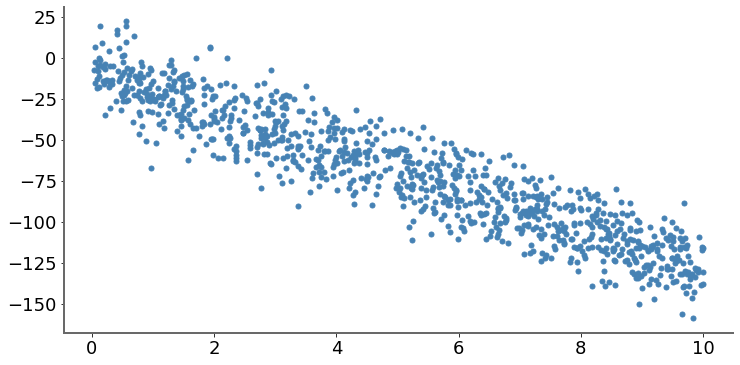

X                :      mean=   4.998  std=   2.887    min=   0.000    max=  10.000
Y                :      mean= -68.990  std=  37.357    min=-187.031    max=  44.445


In [2]:
X,Y = cooker.get_dataset(1000000)

cooker.plot_dataset(X,Y)

## Step 3 : Data normalization

In [3]:
X_norm     = ( X - X.mean() ) / X.std()
Y_norm     = ( Y - Y.mean() ) / Y.std()

cooker.vector_infos('X origine',X)
cooker.vector_infos('X normalized',X_norm)

X origine        :      mean=   4.998  std=   2.887    min=   0.000    max=  10.000
X normalized     :      mean=   0.000  std=   1.000    min=  -1.731    max=   1.732


## Step 4 - Basic descent

### Basic gradient descent :

**With :**  

with :
    epochs = 200
    eta    = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0  +10.985   -6.320  +1.854   -3.097  -0.019


   20   +4.974   -4.219  +1.238   -2.067  -0.321


   40   +2.294   -2.817  +0.827   -1.380  -0.522


   60   +1.100   -1.880  +0.552   -0.921  -0.657


   80   +0.568   -1.255  +0.368   -0.615  -0.747


  100   +0.331   -0.838  +0.246   -0.411  -0.807


  120   +0.225   -0.560  +0.164   -0.274  -0.847


  140   +0.178   -0.374  +0.110   -0.183  -0.874


  160   +0.157   -0.249  +0.073   -0.122  -0.891


  180   +0.148   -0.166  +0.049   -0.082  -0.903


  200   +0.144   -0.111  +0.033   -0.054  -0.911


<br>**Visualization :**

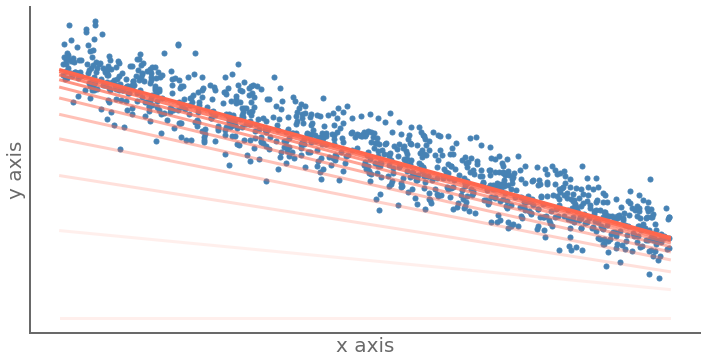

<br>**Loss :**

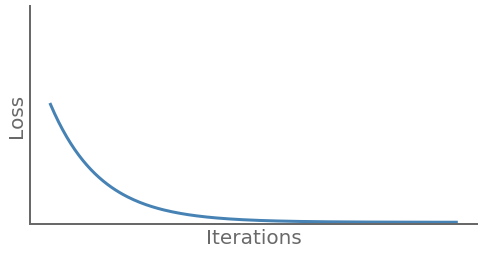

In [4]:
theta = cooker.basic_descent(X_norm, Y_norm, epochs=200, eta=0.01)

## Step 5 - Minibatch descent

### Mini batch gradient descent :

**With :**  

with :
    epochs     = 10
    batchs     = 20
    batch size = 10
    eta        = 0.01


**epochs :**  

    #i   Loss       Gradient         Theta
    0   +0.269   +1.504  +4.800   -0.018  -0.892
    1   +0.205   -1.219  -0.972   +0.031  -0.897
    2   +0.065   +2.933  +0.664   +0.011  -0.913
    3   +0.164   +0.909  -1.088   +0.005  -0.906
    4   +0.060   -0.275  +1.111   +0.003  -0.916
    5   +0.050   +0.588  +0.527   +0.012  -0.912
    6   +0.261   -0.043  +4.887   +0.002  -0.942
    7   +0.278   -3.200  -1.001   +0.013  -0.952
    8   +0.138   -0.386  +1.088   +0.022  -0.948
    9   +0.103   +0.024  -2.836   +0.012  -0.946


<br>**Visualization :**

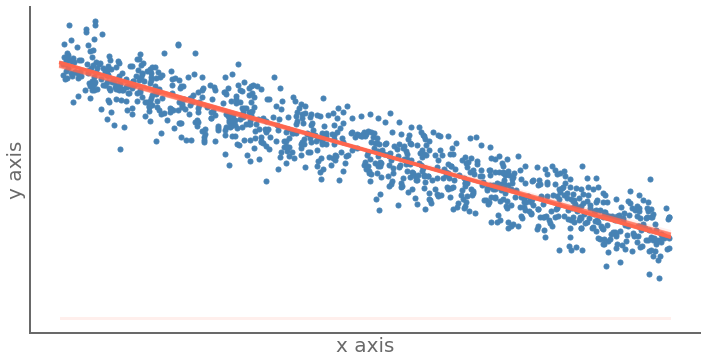

<br>**Loss :**

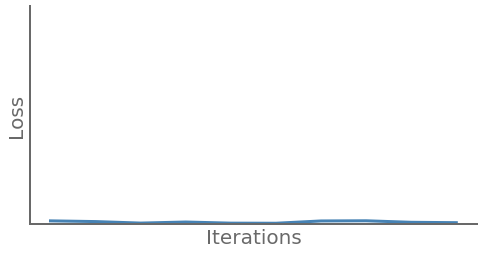

In [5]:
theta = cooker.minibatch_descent(X_norm, Y_norm, epochs=10, batchs=20, batch_size=10, eta=0.01)

In [6]:
pwk.end()

End time is : Wednesday 27 January 2021, 18:21:21
Duration is : 00:00:08 002ms
This notebook ends here


---
<img width="80px" src="../fidle/img/00-Fidle-logo-01.svg"></img>